## Import libraries and USE GPU

In [2]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib

# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


## Prepare Dataset

In [3]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import random
# Using GPU
import os
import scipy.io as scpy

data = scpy.loadmat("all-data.mat")
# Extracting x_train from the mat file dictionary.
x_data = data["XTrain"]
# Extracting y_train from the mat file dictionary.
y_data = data["y_train"]
# Converting x_train and y_train to a numpy array.
x_data = np.array(x_data,dtype='float32')
y_data = np.array(y_data,dtype='float32')-1
x_temp_data=data['XTest']
y_temp_data=data['y_test']
x_temp_data=np.array(x_temp_data,dtype='float32')
y_temp_data=np.array(y_temp_data,dtype='float32')-1
# x_data=np.concatenate((x_data,x_temp_data),axis=0)
# y_data=np.concatenate((y_data,y_temp_data),axis=0)

# Verifying the shapes.
print(x_data.shape)
print(y_data.shape)

SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test and validation sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.2, random_state=SEED)
x_val = x_val_to_use[:int(len(x_val_to_use)/2)]
y_val = y_val_to_use[:int(len(y_val_to_use)/2)]
x_test = x_val_to_use[int(len(x_val_to_use)/2):]
y_test = y_val_to_use[int(len(y_val_to_use)/2):]
print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

(15000, 1000)
(15000, 1)
 (12000, 1500, 1500)
 (12000, 1500, 1500)


### Arange dataset in batches

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

### Check dimension of train, test and validation dataset.

In [5]:
len(x_train), len(x_val), len(x_test)

(12000, 1500, 1500)

## Define Dense model.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 4)                 4004      
                                                                 
 dense_9 (Dense)             (None, 3)                 15        
                                                                 
Total params: 4,019
Trainable params: 4,019
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 32/375 [=>............................] - ETA: 0s - loss: 1.0583 - accuracy: 0.4805 

/home/veysiadn/anaconda3/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


375/375 [==============================] - 1s 3ms/step - loss: 0.6795 - accuracy: 0.7294 - val_loss: 0.4640 - val_accuracy: 0.8427
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8929 - val_loss: 0.2631 - val_accuracy: 0.9340
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2128 - accuracy: 0.9423 - val_loss: 0.1735 - val_accuracy: 0.9540
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1475 - accuracy: 0.9606 - val_loss: 0.1308 - val_accuracy: 0.9613
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9712 - val_loss: 0.1082 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9770 - val_loss: 0.0948 - val_accuracy: 0.9760
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9805 - val_loss: 0.0864 - val_accuracy: 0.9773
Epoch 8/10
375/37

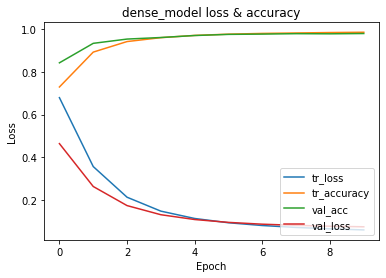

In [53]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

dense_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1000,)),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(3,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=10)
# dense_model.evaluate(val_dataset)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('dense_model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [54]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(dense_model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

ValueError: Only some Keras activations under `tf.keras.activations` are supported. For other activations, use `Quantizer` directly, and update layer config using `QuantizeConfig`.

In [39]:
q_aware_model.fit(x_train, y_train,
                  batch_size=100, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9900 - val_loss: 0.0654 - val_accuracy: 0.9853
Epoch 2/10
120/120 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9942 - val_loss: 0.0725 - val_accuracy: 0.9840
Epoch 3/10
120/120 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9952 - val_loss: 0.0681 - val_accuracy: 0.9880
Epoch 4/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9964 - val_loss: 0.0742 - val_accuracy: 0.9847
Epoch 5/10
120/120 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9962 - val_loss: 0.0782 - val_accuracy: 0.9860
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 0.0225 - accuracy: 0.9967 - val_loss: 0.0743 - val_accuracy: 0.9840
Epoch 7/10
120/120 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9964 - val_loss: 0.0718 - val_accuracy: 0.9873
Epoch 

In [40]:
_, baseline_model_accuracy = dense_model.evaluate(
    x_test, y_test, verbose=0)

_, q_aware_model_accuracy = q_aware_model.evaluate(
   x_test, y_test, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Quant test accuracy:', q_aware_model_accuracy)

Baseline test accuracy: 0.9766666889190674
Quant test accuracy: 0.9800000190734863


In [44]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()
tflite_model_file = pathlib.Path('dense_model_qat_training.tflite')
tflite_model_file.write_bytes(quantized_tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpzrggk5qn/assets


INFO:tensorflow:Assets written to: /tmp/tmpzrggk5qn/assets
/home/veysiadn/anaconda3/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-10-12 16:51:41.801367: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-12 16:51:41.801385: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-12 16:51:41.801477: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpzrggk5qn
2022-10-12 16:51:41.802486: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-12 16:51:41.802499: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpzrggk5qn
2022-10-12 16:51:41.806817: I tensorflow/cc/saved_model/loade

6984

In [51]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_output = []
  for i, test_x in enumerate(x_test):
    test_x = np.expand_dims(test_x, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_x)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_output.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_output = np.array(prediction_output)
  output_predictions = np.expand_dims(prediction_output, axis=1)
  accuracy = (output_predictions == y_test).mean()
  return accuracy

In [52]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)
print('Quant TF test accuracy:', q_aware_model_accuracy)



Quant TFLite test_accuracy: 0.98
Quant TF test accuracy: 0.9800000190734863


## Save dense model as tflite - no optimization.

In [8]:
float_converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
float_tflite_model = float_converter.convert()
import pathlib
tflite_model_file = pathlib.Path('dense_model.tflite')
tflite_model_file.write_bytes(float_tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgad4k7bw/assets


2022-10-12 16:23:40.817925: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-12 16:23:40.817945: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-12 16:23:40.818301: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpgad4k7bw
2022-10-12 16:23:40.818835: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-12 16:23:40.818847: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpgad4k7bw
2022-10-12 16:23:40.820638: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-10-12 16:23:40.821070: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-10-12 16:23:40.840386: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpgad4k7bw
2022-10

18164

In [9]:
!xxd -i dense_model.tflite > dense_model.cc

## Quantize dense model and save it as tflite.
#### Full integer quantization of weights and activations :

<a href='https://www.tensorflow.org/model_optimization/guide/quantization/post_training'> Check this Link</a>

In [10]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_val).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
tflite_model_quant = converter.convert()

tflite_model_file = pathlib.Path('dense_model_optimized.tflite')
tflite_model_file.write_bytes(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmpxbc41h1j/assets


INFO:tensorflow:Assets written to: /tmp/tmpxbc41h1j/assets
/home/veysiadn/anaconda3/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-10-12 16:26:58.561527: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-12 16:26:58.561541: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-12 16:26:58.561620: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpxbc41h1j
2022-10-12 16:26:58.562096: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-12 16:26:58.562106: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpxbc41h1j
2022-10-12 16:26:58.563925: I tensorflow/cc/saved_model/loade

7048

In [16]:
!xxd -i dense_model_optimized.tflite > dense_model_optimized.cc

In [14]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_types = [tf.float32]
converter.inference_input_type = tf.float32  # or tf.uint8
converter.inference_output_type = tf.float32  # or tf.uint8
tflite_quant_model = converter.convert()
tflite_model_file = pathlib.Path('dense_model_full_integer_opt.tflite')
tflite_model_file.write_bytes(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmp745zhh_m/assets


INFO:tensorflow:Assets written to: /tmp/tmp745zhh_m/assets
2022-10-12 16:30:58.904964: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-12 16:30:58.904998: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-12 16:30:58.905162: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp745zhh_m
2022-10-12 16:30:58.905935: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-12 16:30:58.905951: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp745zhh_m
2022-10-12 16:30:58.908250: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-10-12 16:30:58.928513: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp745zhh_m
2022-10-12 16:30:58.932586: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

7048

In [15]:
!xxd -i dense_model_full_integer_opt.tflite > dense_model_full_integer_opt.cc

In [49]:
interpreter = tf.lite.Interpreter(model_path='dense_model.tflite')
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [23]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, indices):
  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)
    test_labels = y_train[index]

    interpreter.set_tensor(input_details["index"], test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    print(output[0])
    print(output[1])
    print(output[2])
    predictions = output.argmax()

  return predictions

In [24]:
import matplotlib.pylab as plt
tflite_model_file = 'dense_model.tflite'
# Change this to test a different image
indice = 333

## Helper function to test the models on one image
def test_model(tflite_file, indice, model_type):

  predictions = run_tflite_model(tflite_file, [indice])

  print(f" Model \n True:{y_test[indice]}, Predicted:{predictions}")
  
test_model(tflite_model_file, indice, model_type="Float")

8.737704e-08
0.00016263525
0.99983716
 Model 
 True:[2], Predicted:2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [ ]:
tf.lite.experimental.Analyzer.analyze(model_path='float_model.tflite')

In [25]:
import numpy as np

def run_tflite_model_for_eval(interpreter, indices):
  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test_to_use[index]
    test_data=np.expand_dims(test_data, axis=0)

    interpreter.set_tensor(input_details["index"], test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions = output.argmax()
  return predictions
  
def evaluate_model(interpreter):
  output_predictions =[]
  for i in range(len(x_test_to_use)):
    output_predictions.append(run_tflite_model_for_eval(interpreter,[i]))
  output_predictions = np.array(output_predictions)
  output_predictions = np.expand_dims(output_predictions, axis=1)
  accuracy = (output_predictions == y_test_to_use).mean()
  return accuracy

In [21]:
interpreter = tf.lite.Interpreter(model_path='dense_model_optimized.tflite')
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Optimized dense_model TFLite test_accuracy:', test_accuracy)
# print('Quant TF test accuracy:', q_aware_model_accuracy)

Optimized dense_model TFLite test_accuracy: 0.9826666666666667


### Model with annotated layers for quantization -- Trial can be skipped.

In [ ]:
# ### Quantization based training
# import tensorflow_model_optimization as tfmot
# quantize_annotate_layer = tfmot.quantization.keras.quantize_annotate_layer

# model = tf.keras.Sequential([
# #### tf.keras.layers :

# quantize_annotate_layer((tf.keras.layers.Reshape((1000,1,1),name='Reshape', input_shape=(1000,)))),
# quantize_annotate_layer(tf.keras.layers.Conv2D(16,7,padding='same')),
# quantize_annotate_layer(tf.keras.layers.Activation('relu')),
# quantize_annotate_layer(tf.keras.layers.MaxPooling2D(4,4,padding='same')),
# quantize_annotate_layer(tf.keras.layers.Conv2D(8,5, padding='same')),
# quantize_annotate_layer(tf.keras.layers.Activation('relu')),
# quantize_annotate_layer(tf.keras.layers.MaxPooling2D(4,4,padding='same')),
# quantize_annotate_layer(tf.keras.layers.MaxPooling2D(2,2,padding='same')),
# quantize_annotate_layer(tf.keras.layers.Flatten()),
# quantize_annotate_layer(tf.keras.layers.Dense(32)),
# quantize_annotate_layer(tf.keras.layers.Dense(3, activation='softmax')),
# ])
# quantized_model = tfmot.quantization.keras.quantize_apply(model)
# # quant_aware_model = tfmot.quantization.keras.quantize_model(base_model)
# # quant_aware_model.summary()
# print(model.summary())
# quantized_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# history = quantized_model.fit(x_train, y_train ,epochs=50, validation_data=(x_test, y_test), verbose=1)   


# # Plotting accuracy and loss
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['val_loss'])


# plt.title('Model loss & accuracy')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# # accuracy!
# print("Training results")
# print(f"Accuracy: {history.history['accuracy'][-1]}")
# print(f"Loss: {history.history['loss'][-1]}")

# # evaluating model
# print("Evaluation results")
# print(f"Accuracy: {history.history['val_accuracy'][-1]}")
# print(f"Loss: {history.history['val_loss'][-1]}")


# plt.show()